In [2]:
# keep over all notebooks
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# list of all libraries needed for the image
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
# create references to different libraries we will use repeatedly
data_home = '/home/pradeep/data/dogbreeds'
%cd $data_home

/home/pradeep/data/dogbreeds


In [5]:
label_df = pd.read_csv('labels.csv')
label_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
%cd train/
%ls

[Errno 2] No such file or directory: 'train/'
/home/pradeep/data/dogbreeds/train
000bec180eb18c7604dcecc8fe0dba07.jpg  813f7061a301759e6fe78f360ff4cd07.jpg
001513dfcb2ffafc82cccf4d8bbaba97.jpg  8141b7ef2da931d7441d3c883ce65b57.jpg
001cdf01b096e06d78e9e5112d419397.jpg  8141c029e973ca29be09417267d1e50b.jpg
00214f311d5d2247d5dfe4fe24b2303d.jpg  814a9fc5db2614bbe59328c16496b50e.jpg
0021f9ceb3235effd7fcde7f7538ed62.jpg  814be837610c46b122ff45f71e97133d.jpg
002211c81b498ef88e1b40b9abf84e1d.jpg  815079d1d62429b3134f2afa1a53ef65.jpg
00290d3e1fdd27226ba27a8ce248ce85.jpg  815949fad325d5bd758bd46c2bbccfaf.jpg
002a283a315af96eaea0e28e7163b21b.jpg  815d3c084bcb79bed798a9774d4ce66b.jpg
003df8b8a8b05244b1d920bb6cf451f9.jpg  8161ff9d8b2b1b91280f268463c51065.jpg
0042188c895a2f14ef64a918ed9c7b64.jpg  8165da6ab285d889a8a6f1980aad5869.jpg
004396df1acd0f1247b740ca2b14616e.jpg  81662662eb22135f0438459487722f98.jpg
0067dc3eab0b3c3ef0439477624d85d6.jpg  816da6c9a52fa67ad45bee98657e541b.jpg
00693b8bc2470375cc7

2db176534ae11dd67b9bfb480d76bcf1.jpg  aeb846fd220051321d1295eb7388fe23.jpg
2db3672a67f51993259a44e702872525.jpg  aec0ee307cbabff63516b55f3a605144.jpg
2db5c814202dff431a0f984ad9df7140.jpg  aec5d7550b6fb110ce6b1adda05dffb1.jpg
2db83abf17de07286072ee5a2d497830.jpg  aed2415f3d996819d68ea82acaca4654.jpg
2dc75d91efef1262d4a646dfc0d8ba31.jpg  aed285c5eae61e3e7ddb5f78e6a7a977.jpg
2dd680898f48be646e420a2d30418c02.jpg  aed87189e6b60b02c3f16566afe8cbd6.jpg
2dd8080c67be70915acbef99bb55b00f.jpg  aedc70a30016c85485369ea541058b2e.jpg
2ddaeb3ee36cba02e028b809a4c88ca4.jpg  aee2775bb66001a6b3b48840710c907d.jpg
2de892b241aeab50aad28c319eaebdbd.jpg  aee6daee7cf47f6daa6ee98c4ceb15a0.jpg
2de8d47770da0fb805ccf8461d062c54.jpg  aee76a0c645d9e2d728ed283c142d04a.jpg
2dfc5a83323990d5e42e2912dc1a884a.jpg  aeedf5985e1a8b0b4dc9f2e43f389150.jpg
2dff4c15cb99effe848ee5e4d977be87.jpg  aef0d510ecb238da32b77e26da8ff327.jpg
2e007b1898639501474d2199a46d7c93.jpg  aef239bc996a3b364aba20025acebc3c.jpg
2e032b14b41870f4d30a23871

In [6]:
PATH = '/home/pradeep/data/dogbreeds/'
%ls $PATH

labels.csv      models/                    sub/   test.zip  train/
labels.csv.zip  sample_submission.csv.zip  test/  tmp/      train.zip


In [7]:
len(label_df)

10222

In [8]:
val_idxs = get_cv_idxs(10222)

In [9]:
val_idxs

array([2882, 4514, 7717, ..., 8922, 6774,   37])

# set model parameters

In [25]:
PATH = '/home/pradeep/data/dogbreeds/'
arch = resnext_101_64x4d
sz = 224
bs = 32

In [27]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', bs, tfms = tfms, val_idxs = val_idxs,
                                    suffix = '.jpg',test_name = 'test')
    return data if sz>300 else data.resize(340,'tmp')

In [28]:
data = get_data(sz,bs)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [13]:
fn = PATH+data.trn_ds.fnames[3];fn

'/home/pradeep/data/dogbreeds/train/002211c81b498ef88e1b40b9abf84e1d.jpg'

In [14]:
sz

224

In [18]:
??ImageClassifierData.from_csv()

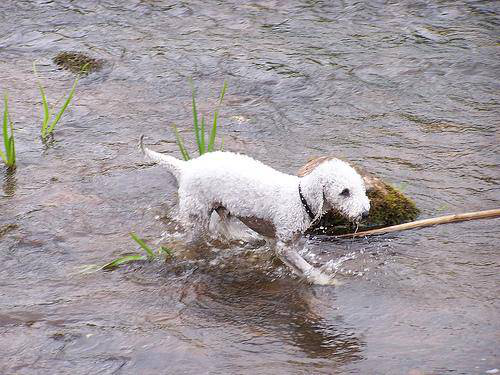

In [35]:
img = PIL.Image.open(fn);img

In [20]:
img.size

(500, 375)

In [21]:
size_d = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}

In [17]:
row_s,col_s= list(zip(*size_d.values()))

In [18]:
row_sz = np.array(row_s); col_sz = np.array(col_s)

(array([  135.,   592.,  1347.,  1164.,  4599.,   128.,    76.,    62.,    14.,    11.]),
 array([  97. ,  185.5,  274. ,  362.5,  451. ,  539.5,  628. ,  716.5,  805. ,  893.5,  982. ]),
 <a list of 10 Patch objects>)

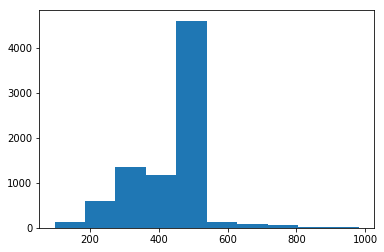

In [94]:
plt.hist(row_sz[row_sz<1000])

(array([  235.,   733.,  2205.,  2979.,  1807.,    98.,    27.,    33.,     7.,    10.]),
 array([ 102.,  190.,  278.,  366.,  454.,  542.,  630.,  718.,  806.,  894.,  982.]),
 <a list of 10 Patch objects>)

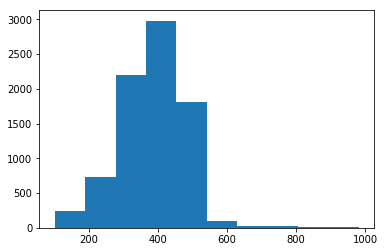

In [97]:
plt.hist(col_sz[col_sz<1000])

In [100]:
len(data.classes)
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


# first model

In [15]:
learn = ConvLearner.pretrained(resnext101_64,data ,ps = 0.5, precompute = True)

In [45]:
learn.fit(1e-2,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.131257   0.425059   0.901752  
    1      0.537644   0.305462   0.914751                    
 58%|█████▊    | 82/141 [00:02<00:01, 37.56it/s, loss=0.414]

Exception in thread Thread-23:
Traceback (most recent call last):
  File "/home/pradeep/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/pradeep/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/pradeep/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



    2      0.380795   0.269595   0.923372                    



[0.26959464, 0.92337164779504144]

In [18]:
learn.fit(1e-2,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.394906   0.280814   0.919061  
    1      0.320651   0.26509    0.912835                    



[0.26509035, 0.9128352552652359]

In [20]:
learn.precompute = False

In [38]:
learn.fit(1e-2,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.412188   0.324449   0.897852  
    1      0.388459   0.332007   0.890189                    
    2      0.373101   0.330261   0.896894                    



[0.33026129, 0.89689381586180794]

In [48]:
learn.fit(1e-2,3, cycle_len = 1, cycle_mult =2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.317132   0.227499   0.928161  
    1      0.29761    0.229023   0.927682                    
    2      0.271938   0.224653   0.930077                    
    3      0.279022   0.23244    0.922893                    
    4      0.251553   0.21963    0.929598                    
    5      0.220958   0.21668    0.930077                    
    6      0.220075   0.218138   0.929598                    



[0.21813783, 0.92959770394696128]

In [40]:
learn.save('resnet101_pre')

In [41]:
learn.load('resnet101_pre')

In [50]:
learn.save('resnext101_pre')

In [21]:
learn.load('resnext101_pre')

In [105]:
learn.save('224_pre')

In [43]:
learn.load('224_pre')

# Choosing a learning rate

In [107]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 87%|████████▋ | 122/141 [01:28<00:13,  1.38it/s, loss=1.66] 

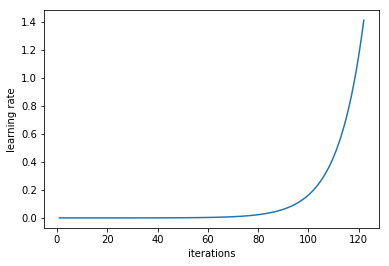

In [108]:
learn.sched.plot_lr()

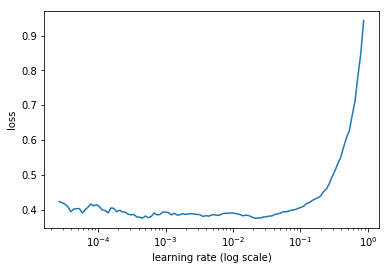

In [109]:
learn.sched.plot()

# try other techniques - cycle mult, unfreeze other layers etc

In [121]:
#arch = resnext101_64

In [50]:
#learn.fit(1e-2,2, cycle_len=1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.429649   0.477023   0.849001  
    1      0.403888   0.469641   0.85379                     
    2      0.402535   0.466863   0.854269                    



[0.46686304, 0.85426929593086243]

In [51]:
#learn.save('224_pre3')

In [56]:
#learn.load('224_pre3')

In [54]:
#learn.fit(1e-1,3,cycle_len=1, cycle_mult =2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.664227   0.53872    0.839423  
    1      0.951131   0.645256   0.815955                    
    2      0.644566   0.530098   0.838533                    
    3      0.819601   0.583446   0.823139                    
    4      0.677186   0.546435   0.83176                     
    5      0.524915   0.48744    0.842775                    
    6      0.489572   0.484061   0.84517                     



[0.48406139, 0.84516967998610604]

In [55]:
#learn.fit(1e-2,2, cycle_len=1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.484365   0.479684   0.847564  
    1      0.461343   0.473898   0.849959                    
    2      0.445373   0.47743    0.847085                    



[0.47743014, 0.84708539313740205]

In [22]:
learn.unfreeze()

In [23]:
lr = np.array([1e-4,1e-3,1e-2])

In [32]:
learn.set_data(get_data(224,bs))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [31]:
bs

32

In [33]:
learn.fit(lr, 3, cycle_len = 1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.268512   0.221638   0.924247  
    1      0.250284   0.228518   0.924247                    
    2      0.228871   0.222341   0.930106                    
  3%|▎         | 8/256 [00:08<04:13,  1.02s/it, loss=0.226]

KeyboardInterrupt: 

In [34]:
learn.set_data(get_data(229,bs))

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [35]:
learn.fit(lr,3,cycle_len =1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  1%|          | 2/256 [00:02<05:49,  1.37s/it, loss=0.261]


Exception in thread Thread-18:
Traceback (most recent call last):
  File "/home/pradeep/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/pradeep/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/pradeep/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                    
    0      0.257416   0.231624   0.920271  
    1      0.247091   0.243468   0.916853                    
    2      0.202568   0.228195   0.920829                    
    3      0.229796   0.239804   0.919713                    
    4      0.20513    0.229342   0.92327                     
    5      0.189886   0.225992   0.92327                     
    6      0.180691   0.224189   0.9232                      



[0.22418927, 0.92320033442229033]

In [51]:
learn.freeze()

In [36]:
learn.save('resnext_101_2')

In [54]:
#learn.fit(1e-2,3,cycle_len = 1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.267347   0.512955   0.846606  
    1      0.264597   0.512664   0.844622                    
    2      0.266543   0.510451   0.846606                    
    3      0.258618   0.518058   0.843186                    
    4      0.273987   0.524386   0.848043                    
    5      0.229881   0.524858   0.84517                     
    6      0.246385   0.522974   0.845101                    



[0.52297354, 0.84510126378801131]

In [84]:
#learn.set_data(get_data(229,bs))

In [60]:
#learn.freeze()

In [74]:
#learn.fit(1e-2,3 ,cycle_len = 1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=32767), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.581795   0.49348    0.842296  
    1      0.553839   0.486018   0.844212                    
    2      0.524278   0.483448   0.848043                    
    3      0.52876    0.47578    0.839901                    
    4      0.488965   0.47709    0.845649                    
    5      0.471119   0.474306   0.84948                     
    6      0.446174   0.470358   0.850985                    
    7      0.478753   0.481533   0.84428                     
    8      0.466424   0.473893   0.838054                    
    9      0.445409   0.474206   0.843254                    
    10     0.39853    0.471521   0.848112                    
    11     0.398581   0.468913   0.847154                    
    12     0.398011   0.467707   0.850506                    
    13     0.369716   0.470192   0.845238                    
    14     0.373423   0.468955   0.848591                    
    15     0.411372   0.47

KeyboardInterrupt: 

In [88]:
#learn.fit(1e-2,3,cycle_len = 1, cycle_mult = 2)

AttributeError: 'ConvLearner' object has no attribute 'trn_dl'

In [37]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs,y)

0.93150684931506844

In [39]:
log_preds2,y2 = learn.TTA(is_test = True)
probs = np.mean(np.exp(log_preds2),0)

In [40]:
probs

array([[ 0.00001,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.00001,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       ..., 
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.00001,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.00003, ...,  0.     ,  0.     ,  0.     ]], dtype=float32)

In [41]:
df = pd.DataFrame(probs)

In [42]:
df.columns = data.classes

In [59]:
df.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,9.669195e-07,3.648532e-12,4.183876e-11,1.134939e-12,2.731987e-11,2.262229e-11,4.532974e-11,3.133313e-11,6.821789e-13,8.550641e-11,...,1.879758e-09,6.479493e-09,1.190661e-09,4.046843e-12,8.331755e-11,1.339553e-11,1.247417e-12,1.375002e-11,4.971469e-12,1.205014e-08
1,1.953982e-06,3.470729e-04,2.392534e-06,3.992994e-06,1.854096e-07,3.592091e-07,3.724726e-07,3.826977e-06,4.763288e-06,1.459611e-08,...,1.858450e-05,1.076234e-08,1.128044e-06,2.927729e-07,8.015633e-08,2.003312e-05,2.992249e-08,2.101643e-07,1.150483e-06,1.391004e-07
2,5.825231e-11,1.373043e-09,7.946134e-11,1.436752e-11,6.006230e-13,2.387473e-13,2.003405e-10,7.675500e-14,1.494428e-10,1.031608e-11,...,3.592019e-10,1.928999e-12,8.623820e-08,1.551010e-12,1.517768e-10,3.421357e-09,2.761438e-13,2.044128e-13,1.233787e-12,1.004001e-10
3,1.127264e-07,6.154227e-09,1.665318e-09,3.050398e-10,3.452213e-10,1.692876e-09,8.372497e-08,4.937681e-10,1.430847e-10,4.581986e-11,...,4.663207e-11,1.099292e-09,1.810914e-10,1.267847e-09,2.130045e-10,3.719007e-09,1.850938e-08,8.740837e-11,8.043922e-11,1.431686e-09
4,1.161624e-08,6.290396e-05,1.256910e-06,2.279891e-07,2.484406e-07,1.121604e-05,8.580835e-07,7.002544e-07,4.690817e-06,3.187695e-06,...,1.487311e-06,2.008266e-08,1.246760e-06,2.126378e-06,4.240331e-07,5.594966e-04,8.879655e-08,2.695147e-07,1.430533e-08,8.790936e-08


In [64]:
data.test_ds.fnames

['test/d359f629f70b113299e0235c2f8f8bda.jpg',
 'test/d06358573fddbbd3c97a1f18da0122ff.jpg',
 'test/b0bf36fe9aa3a00a1367b60886775c38.jpg',
 'test/54c4ecd67a35cd10f94cb2c19dd01cdb.jpg',
 'test/9c57871c52d52861dd9d5bffde87dcc6.jpg',
 'test/374ee8bda761381aa901e66f25d72825.jpg',
 'test/bfc314ddcb147304e1c32e62b178e021.jpg',
 'test/0c1dcbc3c7d2ce6399fb7aa68a70dcda.jpg',
 'test/05e55165cd0b46a63020f8bfafe694e9.jpg',
 'test/47ed2ace69bf91c170a1e5a944bc51dc.jpg',
 'test/07e4edc428816ffe6b8dd1024bed2782.jpg',
 'test/718b1396e07ba1f7e4408979dcd550be.jpg',
 'test/25b45743facea5e9f312ccf620ba29a8.jpg',
 'test/5eac5a257485897e8c92cface1b2f110.jpg',
 'test/6ddad6369722cd52640a5270f2f5ac39.jpg',
 'test/c8da818ea5e06b5c22a9d5d053896927.jpg',
 'test/41128b4a78205adc6daa72712a92ec65.jpg',
 'test/e13f3871a8b4a745717ba6903f0dfe05.jpg',
 'test/2064f8d2099375aba19d74918c66817b.jpg',
 'test/94ec3144f8ebafc776b571b5948ebd00.jpg',
 'test/dbc298c3834590263050e68d1e92057a.jpg',
 'test/e312dda8d35118c40880c0f331c

In [43]:
df.insert(0,'id', [o[5:-4] for o in data.test_ds.fnames])

In [44]:
SUBM = f'{PATH}sub/'
os.makedirs(SUBM, exist_ok = True)
df.to_csv(f'{SUBM}subm2.gz', compression = 'gzip', index = False)

In [45]:
df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,d359f629f70b113299e0235c2f8f8bda,5.898027e-06,2.263375e-09,9.797056e-09,3.960318e-09,6.222597e-09,2.644362e-09,1.203569e-08,6.801995e-09,3.029776e-08,...,1.520548e-08,1.317382e-08,3.565674e-09,2.628698e-09,2.190097e-10,1.148083e-08,3.617816e-09,2.295793e-09,2.019521e-09,1.087509e-07
1,d06358573fddbbd3c97a1f18da0122ff,4.077638e-06,8.461555e-06,4.977049e-07,2.283382e-07,2.370198e-07,2.059491e-08,7.734467e-07,3.581110e-07,2.584475e-07,...,1.486920e-06,1.849206e-08,6.149360e-07,6.020173e-08,7.696604e-08,2.318461e-06,2.446794e-08,3.008082e-08,7.968626e-07,1.813383e-07
2,b0bf36fe9aa3a00a1367b60886775c38,2.264836e-08,3.037978e-08,1.445546e-09,3.134990e-09,1.430058e-09,7.077820e-11,8.634466e-09,1.053994e-10,2.186827e-08,...,5.647535e-08,3.551631e-10,1.728111e-07,4.274907e-11,1.295188e-08,1.108098e-08,9.836668e-09,2.061427e-10,1.382113e-08,4.406428e-08
3,54c4ecd67a35cd10f94cb2c19dd01cdb,2.098247e-08,5.754214e-09,2.730780e-09,2.934735e-09,1.588557e-09,1.120042e-08,2.399882e-08,1.251765e-09,7.911195e-09,...,4.653041e-10,3.031804e-10,9.351504e-10,1.927058e-08,4.108778e-10,2.670083e-09,1.721222e-08,4.186595e-09,1.597948e-09,1.986778e-09
4,9c57871c52d52861dd9d5bffde87dcc6,7.459768e-07,7.101615e-07,1.130774e-07,6.584683e-07,1.680061e-07,5.192392e-06,2.695822e-07,6.062563e-07,1.934330e-06,...,4.070581e-07,3.002628e-07,3.313124e-06,3.146329e-06,1.529708e-06,2.873581e-06,3.194907e-07,8.279149e-08,1.654921e-06,3.344310e-07
